In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import math
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.style.use('seaborn-whitegrid')

<ipython-input-1-9a88af934c30>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
#binary spam data set that we transformed in r and output to a csv
#load dataset, spambase from path in Google Drive folder
path = "/content/drive/Project/binary_spam.csv"

spambase = pd.read_csv(path)
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_.3B,char_freq_.28,char_freq_.5B,char_freq_.21,char_freq_.24,char_freq_.23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,3.756,61,278,1
1,1,1,1,0,1,1,1,1,0,1,...,0,1,0,1,1,1,5.114,101,1028,1
2,1,0,1,0,1,1,1,1,1,1,...,1,1,0,1,1,1,9.821,485,2259,1
3,0,0,0,0,1,0,1,1,1,1,...,0,1,0,1,0,0,3.537,40,191,1
4,0,0,0,0,1,0,1,1,1,1,...,0,1,0,1,0,0,3.537,40,191,1


## Model Fitting, Confusion Matrix and Metrics

In [4]:
#all columns except class (y)
X = spambase.iloc[:,:-2].values

#target variable y is class (1 or 0)
y = spambase.iloc[:,-1].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [7]:
classifier.score(X_train, y_train)

0.9375

In [8]:
classifier.score(X_test, y_test)

0.9305103148751357

In [9]:
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[515,  23],
       [ 41, 342]])

In [11]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       538
           1       0.94      0.89      0.91       383

    accuracy                           0.93       921
   macro avg       0.93      0.93      0.93       921
weighted avg       0.93      0.93      0.93       921



## ROC Curve

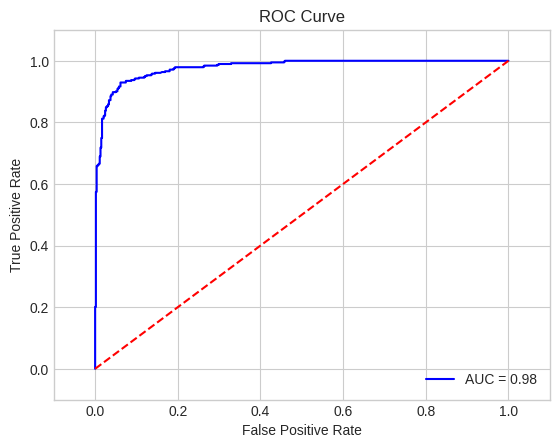

In [12]:
import sklearn.metrics as metrics

probs = classifier.predict_proba(X_test)
preds = probs[:,1]
fp, tp, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fp, tp)


plt.title('ROC Curve')
plt.plot(fp, tp, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()